In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [31]:
df=pd.read_csv("housing_price_dataset.csv")

In [32]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [34]:
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [35]:
df=df.drop_duplicates()

In [36]:
df.dropna()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [37]:
numeric_df=df.select_dtypes(include=['int64','float64'])

In [38]:
y=numeric_df['Price']
x=numeric_df.drop('Price',axis=1)


In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size = 0.2,random_state=42)

In [43]:
ridge_params={'alpha':[0.1,1,10,50,100]}
ridge_cv=GridSearchCV(Ridge(),ridge_params,cv=5)
ridge_cv.fit(x_train,y_train)
ridge_pred=ridge_cv.best_estimator_.predict(x_test)

In [44]:
lasso_params={'alpha':[0.001,0.01,0.1,1,10]}
lasso_cv=GridSearchCV(Lasso(max_iter=5000),lasso_params,cv=5)
lasso_cv.fit(x_train,y_train)
lasso_pred=lasso_cv.best_estimator_.predict(x_test)

In [45]:
print("best ridge r2: ",r2_score(y_test,ridge_pred))
print("best lasso r2: ",r2_score(y_test,lasso_pred))

best ridge r2:  0.9179914220241199
best lasso r2:  0.9179961853521253


<function matplotlib.pyplot.show(close=None, block=None)>

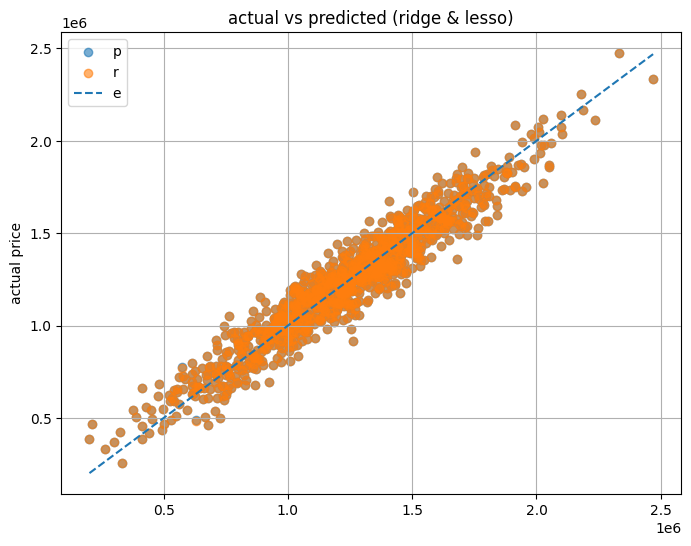

In [46]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,ridge_pred,label="ridge prediction",alpha=0.6)
plt.scatter(y_test,lasso_pred,label="lasso prediction",alpha=0.6)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],linestyle="--")
plt.xlabel
plt.ylabel("actual price")
plt.legend("predicted price")
plt.title("actual vs predicted (ridge & lesso)")
plt.grid(True)
plt.show
